In [1]:
import numpy as np

from keras.models import load_model

from evaluate import evaluate

from tqdm import trange

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import os
from datetime import datetime
import math

/data/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
rn0_model_path = "saved_models/CIFAR10_SmallResNet_eps_0.000/Apr26_17-11-17/weights_050_0.87.h5"
rn2_model_path = "saved_models/CIFAR10_SmallResNet_eps_0.008/Apr26_17-03-48/weights_050_0.67.h5"
rn8_model_path = "saved_models/CIFAR10_SmallResNet_eps_0.031/Apr26_17-05-26/weights_050_0.39.h5"
rn0_model = load_model(rn0_model_path)
rn2_model = load_model(rn2_model_path)
rn8_model = load_model(rn8_model_path)

In [9]:
rn0_test_accuracies = []
for eps in trange(0, 17):
    eps = eps / 255
    rn0_test_accuracies.append(evaluate(rn0_model, "CIFAR10", "test", adv=eps, verbose=0))

100%|██████████| 17/17 [1:12:56<00:00, 275.47s/it]


In [4]:
rn2_test_accuracies = []
for eps in trange(0, 17):
    eps = eps / 255
    rn2_test_accuracies.append(evaluate(rn2_model, "CIFAR10", "test", adv=eps, verbose=0))

100%|██████████| 17/17 [8:58:27<00:00, 1997.12s/it]  


In [5]:
rn8_test_accuracies = []
for eps in trange(0, 17):
    eps = eps / 255
    rn8_test_accuracies.append(evaluate(rn8_model, "CIFAR10", "test", adv=eps, verbose=0))

100%|██████████| 17/17 [3:36:00<00:00, 299.46s/it]  


In [6]:
print(rn0_test_accuracies)

[0.8683, 0.3029, 0.0589, 0.0402, 0.0387, 0.0373, 0.0354, 0.0337, 0.0302, 0.0274, 0.0249, 0.0206, 0.0201, 0.0168, 0.0148, 0.014, 0.0117]


In [7]:
print(rn2_test_accuracies)

[0.8447, 0.762, 0.6606, 0.5432, 0.4247, 0.3232, 0.2332, 0.1636, 0.1069, 0.0693, 0.0444, 0.0272, 0.017, 0.0129, 0.0096, 0.0081, 0.0066]


In [8]:
print(rn8_test_accuracies)

[0.7389, 0.6993, 0.6551, 0.6107, 0.5628, 0.5193, 0.471, 0.4232, 0.3791, 0.3361, 0.2973, 0.2614, 0.2245, 0.1908, 0.1591, 0.1336, 0.1105]


In [8]:
figures_dir = "figures"
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (math.sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches
    
    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ["\\usepackage[lf,minionint,footnotefigures]{MinionPro}"],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
#               'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'serif',
              'mathtext.default': 'regular'
    }

    matplotlib.rcParams.update(params)

%matplotlib inline

latexify()

In [29]:
def save_plot(data,
              min_y=None,
              max_y=None,
              x_label="$\\varepsilon$",
              y_label="Adversarial accuracy",
              y_is_percent=False,
              y_is_log=False,
              y_ticks=None,
              v_lines=None,
              legend=None,
              output="fig.pdf"):
    # Do first so data gets painted over
    if v_lines is not None:
        for x in v_lines:
            plt.axvline(x=x, linestyle="--", color="black", linewidth=0.8)
    if min_y is not None or max_y is not None:
        plt.gca().set_ylim([min_y, max_y])
    for i, series in enumerate(data):
        x, y = zip(*series)
        if legend is None:
            plt.plot(x, y, marker="o", markersize=2)
        else:
            plt.plot(x, y, marker="o", markersize=2, label=legend[i])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if legend is not None:
        plt.legend()
    plt.grid(True, "both", linestyle="dotted")
#     plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    if y_is_percent:
        plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
    if y_is_log:
        plt.yscale("log")
    if y_ticks is not None:
        plt.yticks(y_ticks)
#     plt.tight_layout()
    plt.savefig(os.path.join(figures_dir, output), bbox_inches="tight", pad_inches=0)

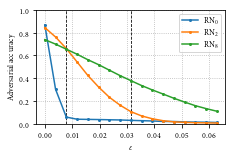

In [30]:
x_axis = [x / 255 for x in range(0, 17)]
data = [
    zip(x_axis, rn0_test_accuracies),
    zip(x_axis, rn2_test_accuracies),
    zip(x_axis, rn8_test_accuracies)
]
v_lines = [2/255, 8/255]

legend = ["RN\\textsubscript{0}", "RN\\textsubscript{2}", "RN\\textsubscript{8}"]

save_plot(data, legend=legend, min_y=0, max_y=1, v_lines=v_lines, output="adv_training.pdf")